In [1]:
import mreels
import matplotlib.pyplot as plt
import numpy as np

In [2]:
eels_stack = mreels.MomentumResolvedDataStack('n-inse_C1_EFTEM-SI-001 [-3,36] eV.dm4')
#eels_scope = mreels.ImagingSetup('n-inse_C1_EFTEM-SI-001 [-3,36] eV.dm4')

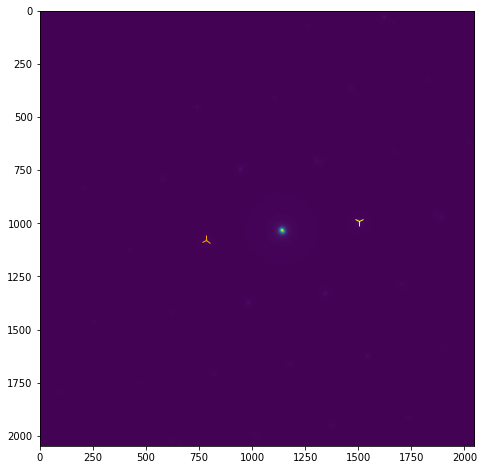

In [5]:
plt.imshow(eels_stack.stack[25].T)
plt.gcf().set_size_inches((8,8))
plt.plot(1503,991, marker='1', markersize=10, color='yellow')
plt.plot(784,1080, marker='2', markersize=10, color='orange')

In [3]:
true_centre = mreels.get_true_centres(eels_stack.stack[25], ((1500,1000),(980,1370)))

In [4]:
true_centre

array([1503, 991, 982, 1373], dtype=object)

In [6]:
qmap, qaxis = mreels.get_qeels_data(eels_stack, 0, 50, 25, (982, 1373), method='line')

  0%|          | 0/35 [00:00<?, ?it/s]/mnt/c/Users/Jeroe/Documents/TU Delft/BEP Python code/mreels.py:287: RuntimeWarning: invalid value encountered in double_scalars
  integral = np.sum(integration_area)/np.sum(entries)
  0%|          | 0/35 [00:00<?, ?it/s]/mnt/c/Users/Jeroe/Documents/TU Delft/BEP Python code/mreels.py:297: RuntimeWarning: invalid value encountered in true_divide
  integral = (np.sum( np.sum(integration_area, axis=2), axis=1)
100%|██████████| 35/35 [01:06<00:00,  1.90s/it]


In [7]:
qmap

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [nan, nan, nan, ..., nan, nan, nan]])

In [8]:
mreels.plot_qeels_data(eels_stack, qmap, qaxis)

ValueError: cannot convert float NaN to integer

In [6]:
qaxis

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])